In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data      # 4-dimensional features
y = iris.target    # True class labels
target_names = iris.target_names

# Optional: Create a DataFrame for easy inspection
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(y, target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Create an SVM classifier with a Radial Basis Function (RBF) kernel.
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

SVC(random_state=42)

In [13]:
# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.967

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



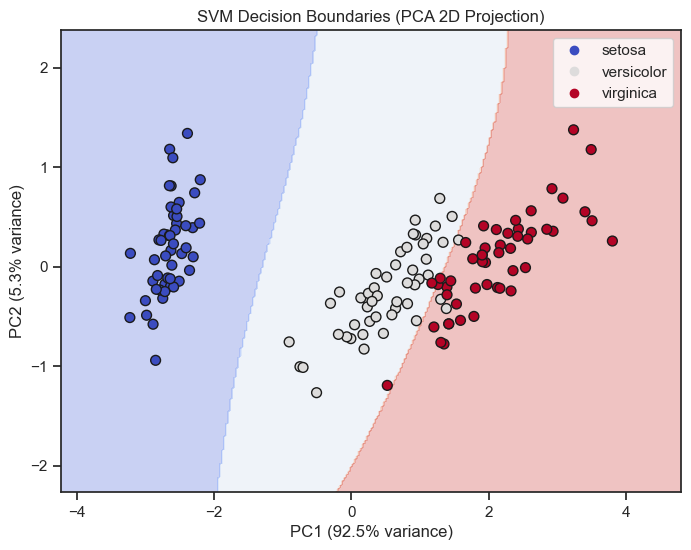

In [16]:
# Assume that 'pca' and 'X_pca' have been computed from the full dataset using:
#   pca = PCA(n_components=2)
#   X_pca = pca.fit_transform(X)
# Also assume that 'svm_pca' is the SVM model trained on PCA-transformed data,
# and that 'y' contains the true labels and 'target_names' is defined.

# Get explained variance ratio and build axis labels accordingly
explained_var = pca.explained_variance_ratio_
pc1_label = f"PC1 ({explained_var[0]*100:.1f}% variance)"
pc2_label = f"PC2 ({explained_var[1]*100:.1f}% variance)"

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on the mesh grid using the SVM trained on PCA-transformed data
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and PCA data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50
)
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.title("SVM Decision Boundaries (PCA 2D Projection)")

# Convert target_names to a list if needed and set legend
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(target_names))
plt.show()
